In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('monks-2.train', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_train

,class,a1,a2,a3,a4,a5,a6,ID
0,0,1,1,1,1,2,2,data_4
1,0,1,1,1,1,4,1,data_7
2,0,1,1,1,2,1,1,data_9
3,0,1,1,1,2,1,2,data_10
4,0,1,1,1,2,2,1,data_11
...,...,...,...,...,...,...,...,...
164,0,3,3,2,2,3,1,data_421
165,0,3,3,2,2,3,2,data_422
166,1,3,3,2,3,1,1,data_425
167,0,3,3,2,3,2,1,data_427


In [3]:
df_test = pd.read_csv('monks-2.test', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_test

,class,a1,a2,a3,a4,a5,a6,ID
0,0,1,1,1,1,1,1,data_1
1,0,1,1,1,1,1,2,data_2
2,0,1,1,1,1,2,1,data_3
3,0,1,1,1,1,2,2,data_4
4,0,1,1,1,1,3,1,data_5
...,...,...,...,...,...,...,...,...
427,0,3,3,2,3,2,2,data_428
428,0,3,3,2,3,3,1,data_429
429,0,3,3,2,3,3,2,data_430
430,0,3,3,2,3,4,1,data_431


In [4]:
X_df_train = df_train.drop(['class', 'ID'], axis=1)
X_df_train = pd.get_dummies(X_df_train, columns=X_df_train.columns)
y_df_train = df_train[['class']]

X_train = torch.from_numpy(X_df_train.to_numpy(dtype=np.float32))
y_train = torch.from_numpy(y_df_train.to_numpy(dtype=np.float32))

print(X_train.shape, y_train.shape)

torch.Size([169, 17]) torch.Size([169, 1])


In [5]:
X_df_test = df_test.drop(['class', 'ID'], axis=1)
X_df_test = pd.get_dummies(X_df_test, columns=X_df_test.columns)
y_df_test = df_test[['class']]

X_test = torch.from_numpy(X_df_test.to_numpy(dtype=np.float32))
y_test = torch.from_numpy(y_df_test.to_numpy(dtype=np.float32))

print(X_test.shape, y_test.shape)

torch.Size([432, 17]) torch.Size([432, 1])


In [6]:
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)


In [7]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_rule)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.7, 0.8), xycoords="axes fraction")
plt.legend();

: 

: 

Epoch is 0   | Loss: 0.7463432550430298     | Test loss: 0.7094986438751221    
Epoch is 5   | Loss: 0.7172430157661438     | Test loss: 0.6811773777008057    
Epoch is 10  | Loss: 0.6895347833633423     | Test loss: 0.6542774438858032    
Epoch is 15  | Loss: 0.6632088422775269     | Test loss: 0.628782331943512     
Epoch is 20  | Loss: 0.6382449865341187     | Test loss: 0.6046656966209412    
Epoch is 25  | Loss: 0.6146143674850464     | Test loss: 0.5818929672241211    
Epoch is 30  | Loss: 0.5922805666923523     | Test loss: 0.5604227781295776    
Epoch is 35  | Loss: 0.571201503276825      | Test loss: 0.5402085781097412    
Epoch is 40  | Loss: 0.5513308644294739     | Test loss: 0.5211998820304871    
Epoch is 45  | Loss: 0.5326189398765564     | Test loss: 0.5033436417579651    
Epoch is 50  | Loss: 0.5150138735771179     | Test loss: 0.48658525943756104   
Epoch is 55  | Loss: 0.4984627068042755     | Test loss: 0.47086912393569946   
Epoch is 60  | Loss: 0.4829120934009552 

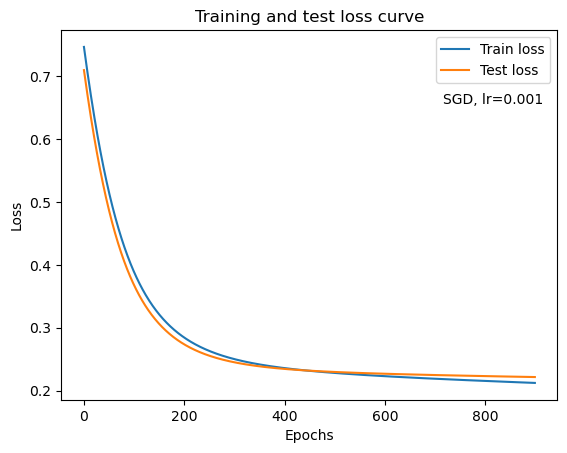

In [34]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_rule)

loss_fn = nn.MSELoss()

lr= 0.001
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 900

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();

In [42]:
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
            m.weight.data.uniform_(0.0, 0.5)
            m.bias.data.fill_(0)

Epoch is 0   | MSE Loss: 0.46133628487586975    | Test MSE loss: 0.4593293368816376    
Epoch is 10  | MSE Loss: 0.44724076986312866    | Test MSE loss: 0.44447633624076843   
Epoch is 20  | MSE Loss: 0.4287022054195404     | Test MSE loss: 0.42488133907318115   
Epoch is 30  | MSE Loss: 0.4044753611087799     | Test MSE loss: 0.399247407913208     
Epoch is 40  | MSE Loss: 0.37388134002685547    | Test MSE loss: 0.3669436275959015    
Epoch is 50  | MSE Loss: 0.3378767669200897     | Test MSE loss: 0.3291788697242737    
Epoch is 60  | MSE Loss: 0.3001110553741455     | Test MSE loss: 0.2901172935962677    
Epoch is 70  | MSE Loss: 0.26654887199401855    | Test MSE loss: 0.2563537657260895    
Epoch is 80  | MSE Loss: 0.24217943847179413    | Test MSE loss: 0.23325997591018677   
Epoch is 90  | MSE Loss: 0.22691498696804047    | Test MSE loss: 0.22066938877105713   
Epoch is 100 | MSE Loss: 0.21660974621772766    | Test MSE loss: 0.21404756605625153   
Epoch is 110 | MSE Loss: 0.20806

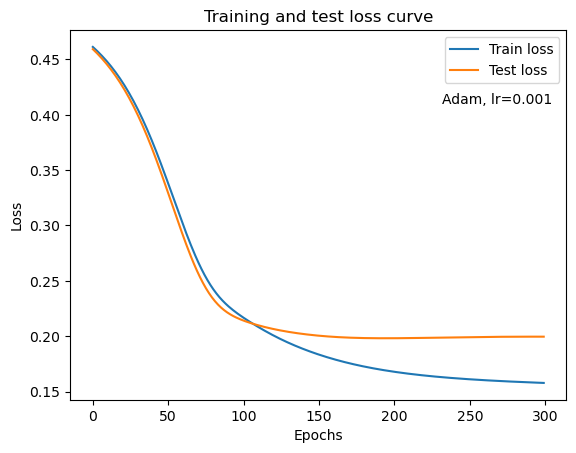

In [50]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.75, 0.8), xycoords="axes fraction")
plt.legend();

Epoch is 0   | Loss: 0.4328492283821106     | Test loss: 0.2637243866920471    
Epoch is 5   | Loss: 0.2584167420864105     | Test loss: 0.2594684958457947    
Epoch is 10  | Loss: 0.2563169598579407     | Test loss: 0.2581402659416199    
Epoch is 15  | Loss: 0.25439098477363586    | Test loss: 0.25693705677986145   
Epoch is 20  | Loss: 0.252575546503067      | Test loss: 0.255819171667099     
Epoch is 25  | Loss: 0.2508184015750885     | Test loss: 0.2547537386417389    
Epoch is 30  | Loss: 0.24907420575618744    | Test loss: 0.2537127435207367    
Epoch is 35  | Loss: 0.24730214476585388    | Test loss: 0.25267109274864197   
Epoch is 40  | Loss: 0.24546381831169128    | Test loss: 0.2516058087348938    
Epoch is 45  | Loss: 0.24352261424064636    | Test loss: 0.25049516558647156   
Epoch is 50  | Loss: 0.24144305288791656    | Test loss: 0.2493187040090561    
Epoch is 55  | Loss: 0.2391911745071411     | Test loss: 0.24805733561515808   
Epoch is 60  | Loss: 0.23673531413078308

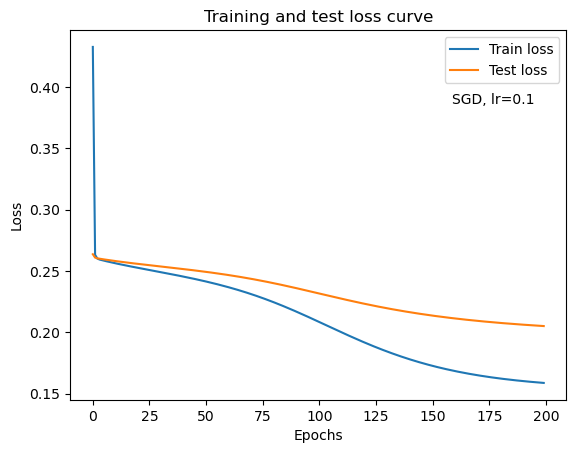

In [49]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr= 0.1
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();